In [2]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory('../data/cats_and_dogs/train',
                                                 target_size=(150,150),
                                                             batch_size=20,  class_mode='binary')
validation_set = test_datagen.flow_from_directory('../data/cats_and_dogs/validate',
                                                 target_size=(150,150),
                                                             batch_size=20,  class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [3]:
# Keras to build a CNN

from keras import layers
from keras import models

# 32 kernels of 3*3 size and size of image(150*150) & coloured image so 3 channels RGB

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
# Compile model

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=0.001),
             metrics=['acc'])

In [5]:
# Fit model

history = model.fit_generator(training_set,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_set,
                              validation_steps=10)
model.save('cats_dogs.h5')

C:\Users\sylvi\AppData\Local\Temp\ipykernel_10832\3681127033.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/30
100/100 [==============================] - 32s 308ms/step - loss: 0.7412 - acc: 0.5237 - val_loss: 0.6835 - val_acc: 0.5350
Epoch 2/30
100/100 [==============================] - 29s 289ms/step - loss: 0.6827 - acc: 0.5732 - val_loss: 0.6546 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 30s 305ms/step - loss: 0.6430 - acc: 0.6594 - val_loss: 0.6344 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 31s 306ms/step - loss: 0.6125 - acc: 0.6821 - val_loss: 0.6375 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 30s 295ms/step - loss: 0.5641 - acc: 0.7149 - val_loss: 0.5648 - val_acc: 0.7200
Epoch 6/30
100/100 [==============================] - 30s 297ms/step - loss: 0.4937 - acc: 0.7664 - val_loss: 0.7221 - val_acc: 0.6300
Epoch 7/30
100/100 [==============================] - 30s 302ms/step - loss: 0.4341 - acc: 0.7982 - val_loss: 0.5940 - val_acc: 0.7600
Epoch 8/30
100/100 [==============================] - 3

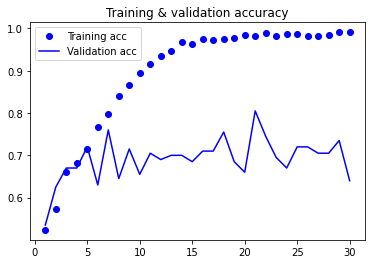

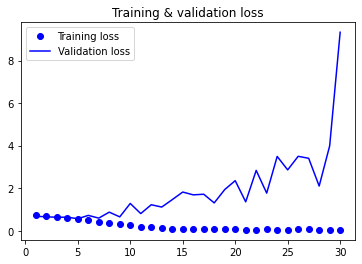

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# bo and b is marker
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & validation loss')
plt.legend()

plt.show()

# Since training accuracy is increasing over time however validation is not improving
# hence it is a case of overfitting i.e. model is unnecessary fitting a complex function, its learning noise from the data.

In [ ]:
# How to avoid this overfitting case -
# 1. Data Augmentation
# 2. Dropout layer - in each layer u r randomly disconnecting some of neuron connections

In [10]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
#test_datagen = ImageDataGenerator(rescale=1./255) - no change in test


training_set = train_datagen.flow_from_directory('../data/cats_and_dogs/train',
                                                 target_size=(150,150),
                                                             batch_size=20,  class_mode='binary')
validation_set = test_datagen.flow_from_directory('../data/cats_and_dogs/validate',
                                                 target_size=(150,150),
                                                             batch_size=20,  class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [11]:
# Compile model

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=0.001),
             metrics=['acc'])

In [12]:
# Fit model
history = model.fit_generator(training_set,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_set,
                              validation_steps=50)

model.save('cats_dogs_new.h5')

C:\Users\sylvi\AppData\Local\Temp\ipykernel_10832\3802580477.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/20
100/100 [==============================] - 33s 323ms/step - loss: 0.7532 - acc: 0.5055 - val_loss: 0.6892 - val_acc: 0.5520
Epoch 2/20
100/100 [==============================] - 32s 320ms/step - loss: 0.6957 - acc: 0.5383 - val_loss: 0.6707 - val_acc: 0.5060
Epoch 3/20
100/100 [==============================] - 33s 328ms/step - loss: 0.6854 - acc: 0.6120 - val_loss: 0.6528 - val_acc: 0.6650
Epoch 4/20
100/100 [==============================] - 33s 331ms/step - loss: 0.6693 - acc: 0.6070 - val_loss: 0.8342 - val_acc: 0.5530
Epoch 5/20
100/100 [==============================] - 33s 326ms/step - loss: 0.6568 - acc: 0.6297 - val_loss: 0.5959 - val_acc: 0.6930
Epoch 6/20
100/100 [==============================] - 33s 328ms/step - loss: 0.6392 - acc: 0.6387 - val_loss: 0.6357 - val_acc: 0.6610
Epoch 7/20
100/100 [==============================] - 32s 323ms/step - loss: 0.6412 - acc: 0.6564 - val_loss: 0.6473 - val_acc: 0.6550
Epoch 8/20
100/100 [==============================] - 3

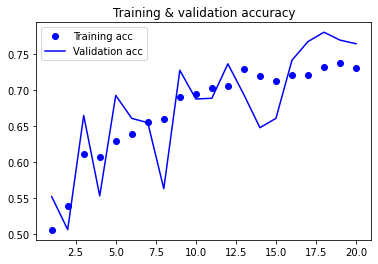

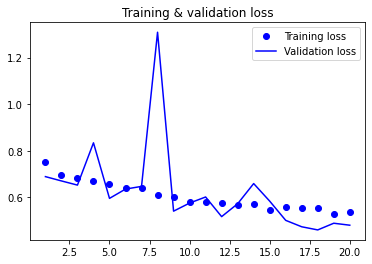

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# bo and b is marker
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & validation loss')
plt.legend()

plt.show()

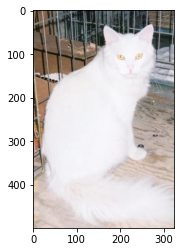

In [124]:
import matplotlib.pyplot as plt
from matplotlib import image as img
test_image = img.imread('../images/c_12434.JPG')
test_image.shape

plt.imshow(test_image)

In [86]:
test_image.shape

(309, 353, 3)

In [125]:
# Format test_image shape as expected by predict method

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../images/c_12434.JPG', target_size=(150,150))

# convert format of images pil to array. predict method expects 2D array
test_image = image.img_to_array(test_image)

# CNN was trained on batch during training and not on single image,
# we have extra dimension for batch. Now for test even though 1 image
# we have to change it to batch format.
test_image = np.expand_dims(test_image, axis=0)


In [96]:
test_image.shape

# Inside the batch we have image of dimension (150*150) & is RGB image

(1, 150, 150, 3)

In [97]:
# To check coding for cats and dogs
training_set.class_indices

{'cat_train': 0, 'dog_train': 1}

In [126]:
# call predict method
rzlt = model.predict(test_image)
# to access the image inside the batch
if rzlt[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [127]:
print(prediction)

cat
